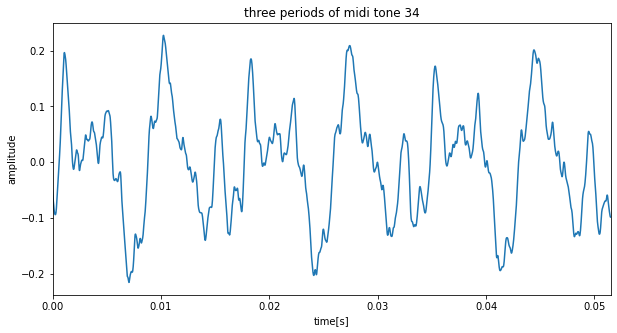

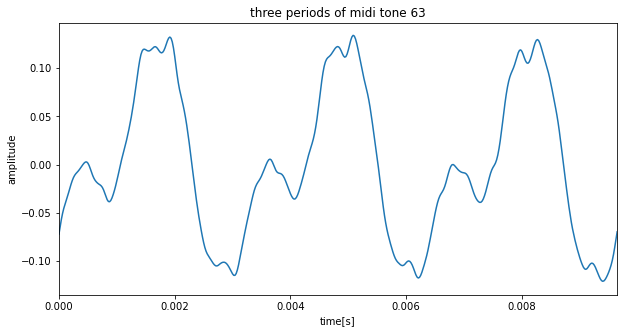

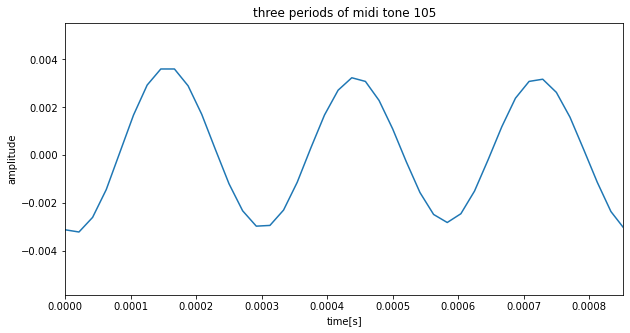

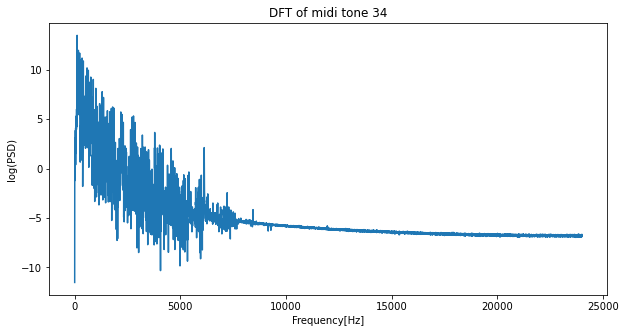

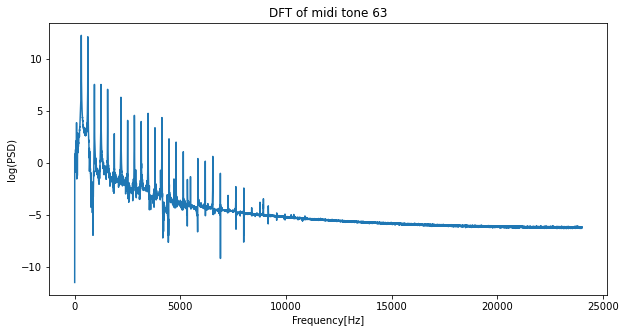

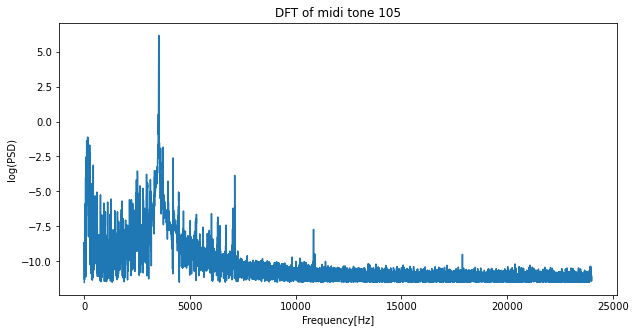

156


In [13]:
#autor: Myron Kukhta(xkukht01), Brno,, 18.12.2022
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import scipy.signal as ss
import array as arr
import os

# 4.1 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  BASIC  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

road = os.path.abspath('../audio')  #found path to /audio

#------------------------------ carcass loading values ---------------------------------------------------------------------#
MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5                                #my period T
WHOLETONE_SEC = 2
howmanytones = MIDITO - MIDIFROM + 1             #my 85
tones = np.arange(MIDIFROM, MIDITO+1)            #my all tones in arr
s, Fs = sf.read(f'{road}/klavir.wav')                    #my s is like arr for all point signal in exponencial form; Fs is vzorkovaci frekvnece 
N = int(Fs * HOWMUCH_SEC)                        #my N = 24 000
Nwholetone = int(Fs * WHOLETONE_SEC)             #my Nwholetone 96 000
xall = np.zeros((MIDITO+1, N))         # matrix with all tones - first signals empty,
                                       # but we have plenty of memory ...
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
for tone in tones:
    x = s[samplefrom:sampleto]
    x = x - np.mean(x) # safer to center ...   #my from 0 - 239000
    xall[tone,:] = x                           #my all tones in xall.
    samplefrom += Nwholetone
    sampleto += Nwholetone
#---------------------------------------------------------------------------------------------------------------------------#




#------------------------------ three periods of three tones----------------------------------------------------------------#

period34 = 1/58.27                                                                # periods of midi tone 34
period63 = 1/311.13                                                               # periods of midi tone 63
period105 = 1/3520.00                                                             # periods of midi tone 105

Nperiod = 3
#------------------------------ tone 32 ----------------------------#
plt.figure(figsize=(10, 5))                                                       
plt.plot(np.arange(xall[34].size)/Fs, xall[34])                        #plot tone. OY: time[s]; OX: amplituda                         
plt.xlim(0, period34*3)                                                # on OX 3 periods                                                
plt.title("three periods of midi tone 34")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()


#----------------------------- tone 63 -----------------------------#
plt.figure(figsize=(10, 5))
plt.plot(np.arange(xall[63].size)/Fs, xall[63])
plt.xlim(0, period63*3)
plt.title("three periods of midi tone 63")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()


#----------------------------- tone 105 -----------------------------#
plt.figure(figsize=(10, 5))
plt.plot(np.arange(xall[105].size)/Fs, xall[105])
plt.xlim(0, period105*3)
plt.title("three periods of midi tone 105")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()




#------------------------------ DFT ----------------------------------------------------------------------------------------#


#----------------------------- DFT tone 34 -------------------------#
moduleDFT34 = np.abs(np.fft.fft(xall[34]))
F34 = np.arange(moduleDFT34[:moduleDFT34.size//2].size)*(Fs/xall[34].size)

plt.figure(figsize=(10, 5))
plt.plot(F34, np.log((moduleDFT34[:moduleDFT34.size//2])**2 + 10**(-5)))
plt.title("DFT of midi tone 34")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()


#----------------------------- DFT tone 63 -------------------------#
moduleDFT63 = np.abs(np.fft.fft(xall[63]))
F63 = np.arange(moduleDFT63[:moduleDFT63.size//2].size)*(Fs/xall[63].size)

plt.figure(figsize=(10, 5))
plt.plot(F63, np.log((moduleDFT63[:moduleDFT63.size//2])**2 + 10**(-5)))
plt.title("DFT of midi tone 63")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()

#----------------------------- DFT tone 105 -------------------------#
moduleDFT105 = np.abs(np.fft.fft(xall[105]))                                      # module dft
F105 = np.arange(moduleDFT105[:moduleDFT105.size//2].size)*(Fs/xall[105].size)    # frenquancy

plt.figure(figsize=(10, 5))
plt.plot(F105, np.log((moduleDFT105[:moduleDFT105.size//2])**2 + 10**(-5)))       # scpectrum .OY: log(PSD); OX: frequancy
plt.title("DFT of midi tone 105")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()

for i in range(0, F34.size):
    if(F34[i]==312):
        print(i)
#------------------------------ wav for my three tones ---------------------------------------------------------------------#

sf.write(f'{road}/a_orig.wav', xall[34], Fs)               # write new audio file with my tone 34
sf.write(f'{road}/b_orig.wav', xall[63], Fs)               # write new audio file with my tone 63
sf.write(f'{road}/c_orig.wav', xall[105], Fs)              # write new audio file with my tone 105


		Fundamental frequency by DFT

fundamental frequency of 24 ton : 66.0
fundamental frequency of 25 ton : 70.0
fundamental frequency of 26 ton : 74.0
fundamental frequency of 27 ton : 78.0
fundamental frequency of 28 ton : 82.0
fundamental frequency of 29 ton : 88.0
fundamental frequency of 30 ton : 92.0
fundamental frequency of 31 ton : 98.0
fundamental frequency of 32 ton : 104.0
fundamental frequency of 33 ton : 110.0
fundamental frequency of 34 ton : 116.0
fundamental frequency of 35 ton : 124.0
fundamental frequency of 36 ton : 130.0
fundamental frequency of 37 ton : 138.0
fundamental frequency of 38 ton : 220.0
fundamental frequency of 39 ton : 234.0
fundamental frequency of 40 ton : 248.0
fundamental frequency of 41 ton : 88.0
fundamental frequency of 42 ton : 92.0
fundamental frequency of 43 ton : 98.0
fundamental frequency of 44 ton : 104.0
fundamental frequency of 45 ton : 110.0
fundamental frequency of 46 ton : 118.0
fundamental frequency of 47 ton : 124.0
fundamental frequen

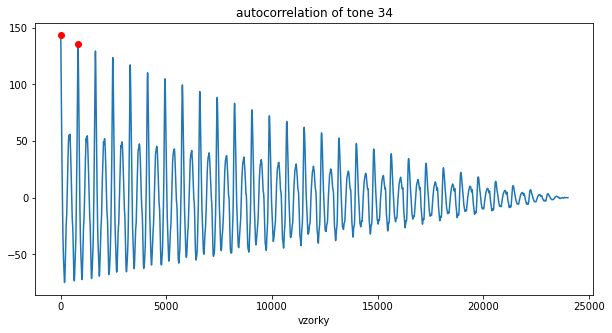

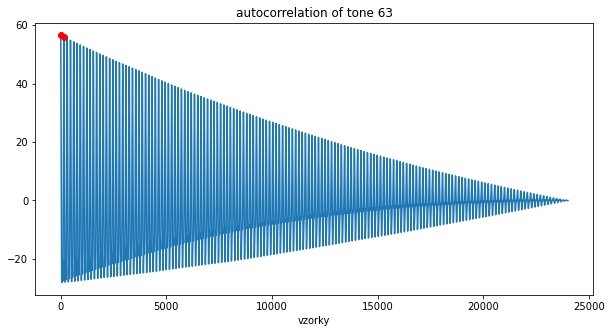

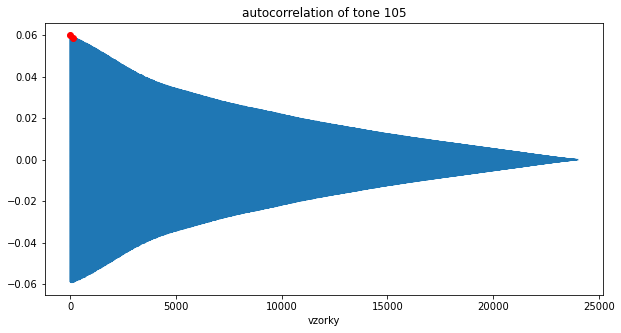



		Fundamental frequency

Fundamental frequency of 24 ton : 32.80929596719071
Fundamental frequency of 25 ton : 34.757422157856624
Fundamental frequency of 26 ton : 36.83806600153492
Fundamental frequency of 27 ton : 39.02439024390244
Fundamental frequency of 28 ton : 41.343669250645995
Fundamental frequency of 29 ton : 43.7956204379562
Fundamental frequency of 30 ton : 46.42166344294004
Fundamental frequency of 31 ton : 49.18032786885246
Fundamental frequency of 32 ton : 52.11726384364821
Fundamental frequency of 33 ton : 55.172413793103445
Fundamental frequency of 34 ton : 58.465286236297196
Fundamental frequency of 35 ton : 61.935483870967744
Fundamental frequency of 36 ton : 65.57377049180327
Fundamental frequency of 37 ton : 69.46454413892909
Fundamental frequency of 38 ton : 73.61963190184049
Fundamental frequency of 39 ton : 77.92207792207793
Fundamental frequency of 40 ton : 82.61617900172118
Fundamental frequency of 41 ton : 87.75137111517367
Fundamental frequency of 42 ton :

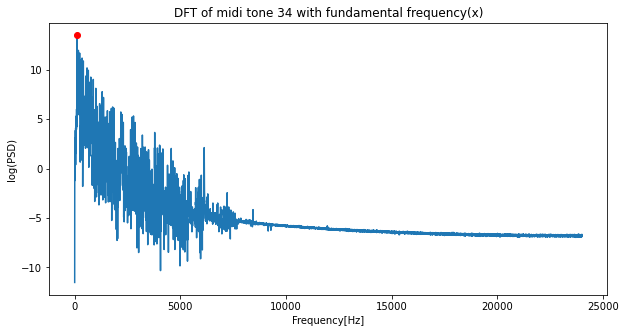

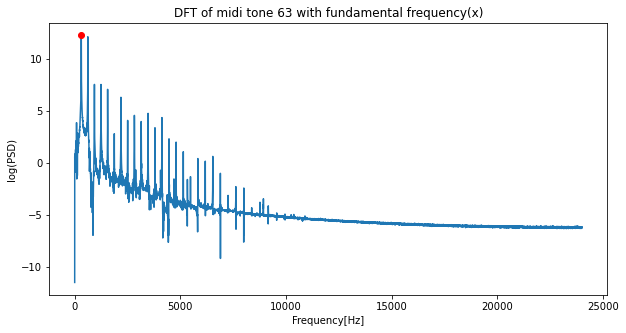

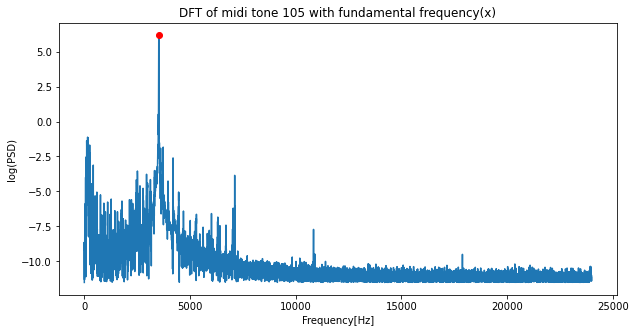

In [14]:
# 4.2 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  DETERMINATION OF FUNDAMENTAL FREQUENCY   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<





#---------------------------- fundamental frequency by DFT ----------------------------------------------------------


#-------------------- fundamental frequency of all tones -------------------

def my_find_peaks(number_ton):  #found fundamental frequency by DFT
    
    oy = -1000  # the highest peak
    index = 0   # his index
    
    moduleDFTactual = np.abs(np.fft.fft(xall[number_ton]))  #the module of the actual DFT ton
    FActual = np.arange(moduleDFTactual[:moduleDFTactual.size//2].size)*(Fs/xall[number_ton].size)
    
    for i in range(0, FActual.size):  # in the cycle found the highest peak, and the frequency that corresponds to this peak is the fundamental frequence
        if(np.log((moduleDFTactual[i])**2 + 10**(-5)) > oy):  #compare the value of OX by their index and their corresponding height(OY)
            oy = np.log((moduleDFTactual[i])**2 + 10**(-5))
            index = i
    
    return FActual[index], index #fundamental frequency, index of fundamental frequency



array_fr_by_DFT = np.arange(0.0, 85.0)  # all fundamental frequency by DFT
array_index_fr_by_DFT = np.arange(0, 85)  # all index of fundamental frequency by DFT

for i in range(24, 109):  # saving the value of all fundamental frequency by DFT
    array_fr_by_DFT[i - 24], array_index_fr_by_DFT[i - 24] = my_find_peaks(i)

print("\t\tFundamental frequency by DFT\n")
for i in range(0, array_fr_by_DFT.size):
    print(f"fundamental frequency of {i+24} ton : {array_fr_by_DFT[i]}")


#---------------------------- fundamental frequency by autocorrelation --------------------------------------------------------
#do 42
def autocorrelation(number_ton):  #found fundamental frequency by autocorrelation
    correlate_ton = np.correlate(xall[number_ton], xall[number_ton], "full")  # autocorrelation of my ton
    correlate_tonHalf = correlate_ton[(correlate_ton.size-1)//2:] # half of my autocorrelation(because symmetrical)
    
    max_peak_col = max(correlate_tonHalf)  # found the biggest peak
    index_max_peak_col = np.where(correlate_tonHalf == max_peak_col) # found his index
    index_max_peak_col = index_max_peak_col[0][0]
    
    min_peak_col = min(correlate_tonHalf)  # found second biggest peak
    index_min_peak_col = np.where(correlate_tonHalf == min_peak_col)
    index_min_peak_col = index_min_peak_col[0][0]
    
    second_max_peak_col = max(correlate_tonHalf[index_min_peak_col+1:])  # found second biggest peak
    second_index_max_peak_col = np.where(correlate_tonHalf == second_max_peak_col)  # found his index
    second_index_max_peak_col = second_index_max_peak_col[0][0]
    
    fundamental_frequency = ((1/second_index_max_peak_col)*Fs)  # F = (1/N)*Fs

    
    return fundamental_frequency, second_index_max_peak_col



array_fr_by_cor = np.arange(0.0, 85.0)  # all fundamental frequency by autocorrelation
index_array_fr_by_cor = np.arange(0.0, 85.0)  # all index of fundamental frequency by autocorrelation

for i in range(24, 109):  # saving the value of all fundamental frequency by autocorrelation
    array_fr_by_cor[i - 24], index_array_fr_by_cor[i - 24] = autocorrelation(i)

    
print("\n\n\t\tFundamental frequency by autocorrelation\n")    
for i in range(0, array_fr_by_cor.size):
    print(f"Fundamental  frequency of {i+24} ton : {array_fr_by_cor[i]}")


#show autocorrelation of my tone
ct34 = np.correlate(xall[34], xall[34], "full")
cеHalf34 = ct34[(ct34.size-1)//2:]
ct63 = np.correlate(xall[63], xall[63], "full")
cеHalf63 = ct63[(ct63.size-1)//2:]
ct105 = np.correlate(xall[105], xall[105], "full")
cеHalf105 = ct105[(ct105.size-1)//2:]

plt.figure(figsize=(10, 5))  # autocorrelation better work for small frequency
plt.plot(cеHalf34)
plt.plot(0, cеHalf34[0], "ro")  # first hight peak
plt.plot(index_array_fr_by_cor[34-24], cеHalf34[int(index_array_fr_by_cor[34-24])], "ro") # second hight peak
plt.title("autocorrelation of tone 34")
plt.xlabel("vzorky")
plt.show()

plt.figure(figsize=(10, 5))  # in the big frequency we can see degradation
plt.plot(cеHalf63)
plt.plot(0, cеHalf63[0], "ro")  # first hight peak
plt.plot(index_array_fr_by_cor[63-24], cеHalf63[int(index_array_fr_by_cor[63-24])], "ro") # second hight peak
plt.title("autocorrelation of tone 63")
plt.xlabel("vzorky")
plt.show()


plt.figure(figsize=(10, 5))  # in the big frequency we can see degradation
plt.plot(cеHalf105)
plt.plot(0, cеHalf105[0], "ro")  # first hight peak
plt.plot(index_array_fr_by_cor[105-24], cеHalf105[int(index_array_fr_by_cor[105-24])], "ro") # second hight peak
plt.title("autocorrelation of tone 105")
plt.xlabel("vzorky")
plt.show()

    
#---------------------------- general fundamental frequency -------------------------------------------------------------------

f_f = np.arange(0.0, 85.0)  # all true fundamental frequency
f_f[:18] = array_fr_by_cor[:18]  # for small frequency autocorrelation
f_f[18:] = array_fr_by_DFT[18:]  # for more big frequency DFT

print("\n\n\t\tFundamental frequency\n")
for i in range(0, f_f.size):
    print(f"Fundamental frequency of {i+24} ton : {f_f[i]}")
    

#-------------------- fundamental frequency of tone 34 ---------------------
print()

plt.figure(figsize=(10, 5))
plt.plot(F34, np.log((moduleDFT34[:moduleDFT34.size//2])**2 + 10**(-5)))
plt.plot(f_f[34-24]*2, np.log((moduleDFT34[np.where(F34 == (f_f[34-24]//1)*2)])**2 + 10**(-5)), "ro")
plt.title("DFT of midi tone 34 with fundamental frequency(x)")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()

#-------------------- fundamental frequency of tone 63 ---------------------
plt.figure(figsize=(10, 5))
plt.plot(F63, np.log((moduleDFT63[:moduleDFT63.size//2])**2 + 10**(-5)))
plt.plot(f_f[63-24], np.log((moduleDFT63[array_index_fr_by_DFT[63-24]])**2 + 10**(-5)), "ro")
plt.title("DFT of midi tone 63 with fundamental frequency(x)")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()
 
#-------------------- fundamental frequency of tone 105 --------------------
plt.figure(figsize=(10, 5))
plt.plot(F105, np.log((moduleDFT105[:moduleDFT105.size//2])**2 + 10**(-5)))
plt.plot(f_f[105-24], np.log((moduleDFT105[array_index_fr_by_DFT[105-24]])**2 + 10**(-5)), "ro")
plt.title("DFT of midi tone 105 with fundamental frequency(x)")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()







In [15]:
# 4.3 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  REFINEMENT OF  FUNDAMENTAL FREQUENCY ESTIMATION   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#---------------- function DTFT--------------------------

# the function found_f0_by_dtft() takes a VERY long time to process

def found_f0_by_dtft(index_ton):
    if(index_ton<41):            # work with 24-40 tons with small frequancy
        freq_interval = 92       # diaposon for found approximate fundamental frequency 
        freq_points = 300        # point for found in interval 
    elif(index_ton>80):          # work with 41-80 tons with middle frequancy
        freq_interval = 3       
        freq_points = 1000
    else:                        #work with 80-108 tons with big frequancy
        freq_interval = 4     
        freq_points = 600
    N = 24000                # frekquency of my ton
    
    n = np.arange(0, Fs/2)   # range 0...24
    
    freq_from = f_f[index_ton-24]-freq_interval  # frequency where start search
    freq_to = f_f[index_ton-24]+freq_interval    # frequency where s search
    freq_distribution = np.linspace(freq_from, freq_to, freq_points) # evenly spaced numbers over a interval for my frequancy


    A = np.zeros([freq_points, N],dtype=complex)  # matrix filled with empty complex numbers
    for k in np.arange(0,freq_points):
        A[k,:] = np.exp(-1j * 2 * np.pi * freq_distribution[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs ...
    dtft_out = np.matmul(A,xall[index_ton].T)  # count our dtdt, when multiply of matrix omega and transposed matrix of my ton
    
    f0 = freq_distribution[np.argmax(np.abs(dtft_out))]  # found our fundamental frequancy (the biggest frekvency in dtft)
    
    if(index_ton<41 or (index_ton>=53 and index_ton<56)):  # if 4-40 tons with small frequancy f0 = f0/2
        return f0/2
    return f0
#-----------------------filling the array of my finaly fundamental frequancy f0 by DTFT------------

f0_dtft = np.zeros(85)  # make array of my finaly fundamental frequancy f0 by DTFT

for i in range(24, 109):  # filling the array of my finaly fundamental frequancy f0 by DTFT
    f0_dtft[i-24] = found_f0_by_dtft(i)

print("\n\n\t\tFinaly fundamental frequency by DTFT\n")
for i in range(0, f0_dtft.size):
    print(f"Fundamental frequency of {i+24} ton : {f0_dtft[i]}")





		Finaly fundamental frequency by DTFT

Fundamental frequency of 24 ton : 32.558494137441514
Fundamental frequency of 25 ton : 34.7633264635437
Fundamental frequency of 26 ton : 36.72672530845976
Fundamental frequency of 27 ton : 38.74296435272046
Fundamental frequency of 28 ton : 41.13337308686147
Fundamental frequency of 29 ton : 43.590117911285795
Fundamental frequency of 30 ton : 46.13390864454695
Fundamental frequency of 31 ton : 49.051702395964696
Fundamental frequency of 32 ton : 51.750939614131795
Fundamental frequency of 33 ton : 54.81697612732096
Fundamental frequency of 34 ton : 58.30956619507168
Fundamental frequency of 35 ton : 61.583126550868485
Fundamental frequency of 36 ton : 65.24842370744011
Fundamental frequency of 37 ton : 69.03996437715685
Fundamental frequency of 38 ton : 73.57904672015101
Fundamental frequency of 39 ton : 77.8841158841159
Fundamental frequency of 40 ton : 82.38501257778367
Fundamental frequency of 41 ton : 87.70462654088318
Fundamental frequen

	f0...5f0 for tone 34
tone 34: 1*f0 = 58.30956619507168, faze = 257.0, modul = 244.0
tone 34: 2*f0 = 87.54220931322028, faze = 177.0, modul = 55.0
tone 34: 3*f0 = 116.69699241075612, faze = 66.0, modul = 55.0
tone 34: 4*f0 = 204.46903401105595, faze = 228.0, modul = 56.0
tone 34: 5*f0 = 292.3170617445892, faze = 139.0, modul = 152.0

	f0...5f0 for tone 64
tone 63: 1*f0 = 311.085141903172, faze = 241.0, modul = 231.0
tone 63: 2*f0 = 621.669449081803, faze = 0.0, modul = 262.0
tone 63: 3*f0 = 933.4223706176963, faze = 385.0, modul = 312.0
tone 63: 4*f0 = 1244.8547579298831, faze = 299.0, modul = 338.0
tone 63: 5*f0 = 1558.2771285475794, faze = 91.0, modul = 513.0

	f0...5f0 for tone 105
tone 105: 1*f0 = 3521.6906906906906, faze = 356.0, modul = 448.0
tone 105: 2*f0 = 7044.54954954955, faze = 883.0, modul = 694.0
tone 105: 3*f0 = 10564.240240240239, faze = 179.0, modul = 361.0
tone 105: 4*f0 = 14084.60960960961, faze = 31.0, modul = 141.0
tone 105: 5*f0 = 17611.453453453454, faze = 840.0,

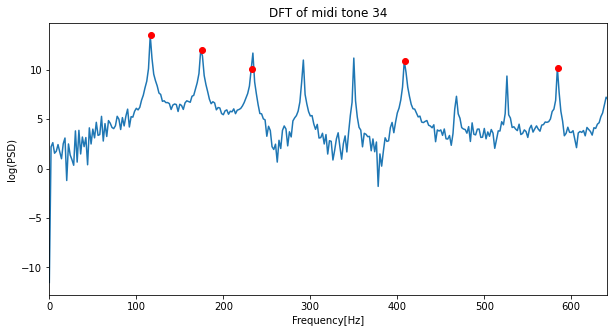

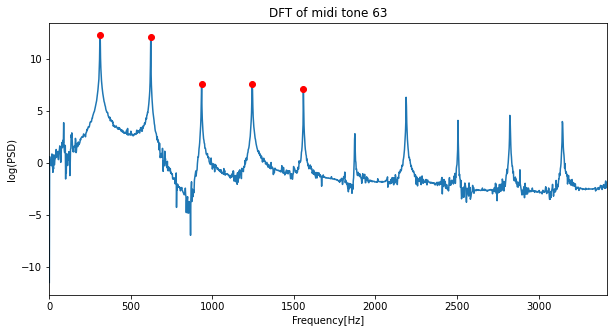

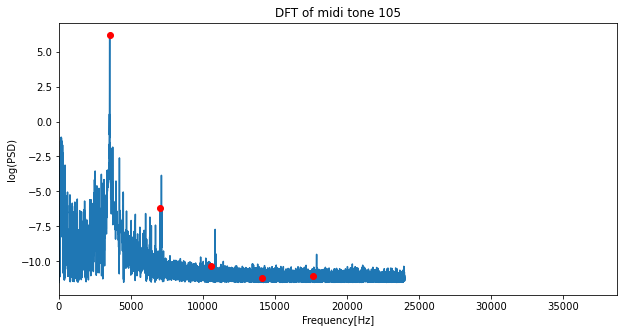

In [16]:
# 4.4 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  REPRESENTATION OF THE PIANO   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#small changes to the function for calculating the dtft from the last task

def found_f0_by_dtft_for_4(index_ton, f0_dtft_old):
    if(index_ton<41):
        freq_interval = 92       # diaposon for found approximate fundamental frequency f0 50
        freq_points = 300        # point for found in interval                             200
    elif(index_ton>80):
        freq_interval = 3       # diaposon for found approximate fundamental frequency f0 50
        freq_points = 1000        # point for found in interval 200
    else:
        freq_interval = 4       # diaposon for found approximate fundamental frequency f0 50
        freq_points = 600        # point for found in interval 200
    N = 24000                # frekquency of my ton
    
    n = np.arange(0, Fs/2)   # range 0...24
    
    freq_from = f0_dtft_old-freq_interval  # frequency where start search
    freq_to = f0_dtft_old+freq_interval    # frequency where s search
    freq_distribution = np.linspace(freq_from, freq_to, freq_points) # evenly spaced numbers over a interval for my frequancy


    A = np.zeros([freq_points, N],dtype=complex)  # matrix filled with empty complex numbers
    for k in np.arange(0,freq_points):
        A[k,:] = np.exp(-1j * 2 * np.pi * freq_distribution[k] / Fs * n)     # norm. omega = 2 * pi * f / Fs ...
    dtft_out = np.matmul(A,xall[index_ton].T)  # count our dtdt, when multiply of matrix omega and transposed matrix of my ton
    
    f0 = freq_distribution[np.argmax(np.abs(dtft_out))]  # found our fundamental frequancy (the biggest frekvency in dtft)
    if(index_ton<41):
        return f0/2, np.argmax(np.angle(dtft_out)), np.argmax(np.abs(dtft_out))
    return f0, np.argmax(np.angle(dtft_out)), np.argmax(np.abs(dtft_out))

#------------------------------ f0...5f0, faze, modul -------------------------------------------------------------------------#

#----------------------------- f0...5f0, faze, modul for tone 34 -------------------------#
_f0_34_co = np.zeros(5)      #array to f0...5f0
_f0_34_faze = np.zeros(5)    # array for faze 
_f0_34_modul = np.zeros(5)   # array for modul 
_f0_34_co[0], _f0_34_faze[0], _f0_34_modul[0] = found_f0_by_dtft_for_4(34, f_f[34-24])    #f0_dtft[34-24] calc f0...5f0, faze, modul
_f0_34_co[1], _f0_34_faze[1], _f0_34_modul[1] = found_f0_by_dtft_for_4(34, (4*f0_dtft[34-24]))#x2 coeficient because we have some features in work with tones small frequancy , write about it in 4.2 and 4.3
_f0_34_co[2], _f0_34_faze[2], _f0_34_modul[2] = found_f0_by_dtft_for_4(34, (5*f0_dtft[34-24]))
_f0_34_co[3], _f0_34_faze[3], _f0_34_modul[3] = found_f0_by_dtft_for_4(34, (8*f0_dtft[34-24]))
_f0_34_co[4], _f0_34_faze[4], _f0_34_modul[4] = found_f0_by_dtft_for_4(34, (10*f0_dtft[34-24]))


#----------------------------- f0...5f0, faze, modul for tone 63 -------------------------#
_f0_63_co = np.zeros(5)      #array to f0...5f0
_f0_63_faze = np.zeros(5)    # array for faze 
_f0_63_modul = np.zeros(5)   # array for modul 
_f0_63_co[0], _f0_63_faze[0], _f0_63_modul[0] = found_f0_by_dtft_for_4(63, f_f[63-24])
_f0_63_co[1], _f0_63_faze[1], _f0_63_modul[1] = found_f0_by_dtft_for_4(63, 2*f0_dtft[63-24])
_f0_63_co[2], _f0_63_faze[2], _f0_63_modul[2] = found_f0_by_dtft_for_4(63, 3*f0_dtft[63-24])
_f0_63_co[3], _f0_63_faze[3], _f0_63_modul[3] = found_f0_by_dtft_for_4(63, 4*f0_dtft[63-24])
_f0_63_co[4], _f0_63_faze[4], _f0_63_modul[4] = found_f0_by_dtft_for_4(63, 5*f0_dtft[63-24])


#----------------------------- f0...5f0, faze, modul for tone 105 -------------------------#
_f0_105_co = np.zeros(5)      #array to f0...5f0
_f0_105_faze = np.zeros(5)    # array for faze
_f0_105_modul = np.zeros(5)   # array for modul
_f0_105_co[0], _f0_105_faze[0], _f0_105_modul[0] = found_f0_by_dtft_for_4(105, f_f[105-24])
_f0_105_co[1], _f0_105_faze[1], _f0_105_modul[1] = found_f0_by_dtft_for_4(105, 2*f0_dtft[105-24])
_f0_105_co[2], _f0_105_faze[2], _f0_105_modul[2] = found_f0_by_dtft_for_4(105, 3*f0_dtft[105-24])
_f0_105_co[3], _f0_105_faze[3], _f0_105_modul[3] = found_f0_by_dtft_for_4(105, 4*f0_dtft[105-24])
_f0_105_co[4], _f0_105_faze[4], _f0_105_modul[4] = found_f0_by_dtft_for_4(105, 5*f0_dtft[105-24])


print("\tf0...5f0 for tone 34")
for i in range(0, 5):
    print(f"tone 34: {i+1}*f0 = {_f0_34_co[i]}, faze = {_f0_34_faze[i]}, modul = {_f0_34_modul[i]}")
print("\n\tf0...5f0 for tone 64")
for i in range(0, 5):
    print(f"tone 63: {i+1}*f0 = {_f0_63_co[i]}, faze = {_f0_63_faze[i]}, modul = {_f0_63_modul[i]}")
print("\n\tf0...5f0 for tone 105")
for i in range(0, 5):
    print(f"tone 105: {i+1}*f0 = {_f0_105_co[i]}, faze = {_f0_105_faze[i]}, modul = {_f0_105_modul[i]}")
#----------------------------- DFT tone 34 -------------------------#

plt.figure(figsize=(10, 5))
plt.plot(F34, np.log((moduleDFT34[:moduleDFT34.size//2])**2 + 10**(-5)))
plt.xlim([0, 11*f0_dtft[34-24]])  # limit from 0 to 11 x frequancy
plt.plot(_f0_34_co[0]*2, np.log((moduleDFT34[np.where(F34 == float(int(_f0_34_co[0]))*2)])**2 + 10**(-5)), 'ro') #x2 coeficient because we have some features in work with tones small frequancy , write about it in 4.2 and 4.3
plt.plot(_f0_34_co[1]*2, np.log((moduleDFT34[np.where(F34 == float(int(_f0_34_co[1]))*2)])**2 + 10**(-5)), 'ro')
plt.plot(_f0_34_co[2]*2, np.log((moduleDFT34[np.where(F34 == float(int(_f0_34_co[2]))*2)])**2 + 10**(-5)), 'ro')
plt.plot(_f0_34_co[3]*2, np.log((moduleDFT34[np.where(F34 == float(int(_f0_34_co[3]))*2)])**2 + 10**(-5)), 'ro')
plt.plot(_f0_34_co[4]*2, np.log((moduleDFT34[np.where(F34 == float(int(_f0_34_co[4]))*2)])**2 + 10**(-5)), 'ro')

plt.title("DFT of midi tone 34")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()

#----------------------------- DFT tone 63 -------------------------#

plt.figure(figsize=(10, 5))
plt.plot(F63, np.log((moduleDFT63[:moduleDFT63.size//2])**2 + 10**(-5)))
plt.plot(_f0_63_co[0], np.log((moduleDFT63[np.where(F63 == float(int(_f0_63_co[0]))+1)])**2 + 10**(-5)), 'ro')  #plus 1 because tones after rounding can be odd but in F63/F34/F105 only even
plt.plot(_f0_63_co[1], np.log((moduleDFT63[np.where(F63 == float(int(_f0_63_co[1]))+1)])**2 + 10**(-5)), 'ro')
plt.plot(_f0_63_co[2], np.log((moduleDFT63[np.where(F63 == float(int(_f0_63_co[2]))+1)])**2 + 10**(-5)), 'ro')
plt.plot(_f0_63_co[3], np.log((moduleDFT63[np.where(F63 == float(int(_f0_63_co[3])))])**2 + 10**(-5)), 'ro')
plt.plot(_f0_63_co[4], np.log((moduleDFT63[np.where(F63 == float(int(_f0_63_co[4])))])**2 + 10**(-5)), 'ro')
plt.xlim([0, 11*f0_dtft[63-24]])

plt.title("DFT of midi tone 63")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()

#----------------------------- DFT tone 105 -------------------------#

plt.figure(figsize=(10, 5))
plt.plot(F105, np.log((moduleDFT105[:moduleDFT105.size//2])**2 + 10**(-5)))
plt.plot(_f0_105_co[0], np.log((moduleDFT105[np.where(F105 == float(int(_f0_105_co[0]))+1)])**2 + 10**(-5)), 'ro')
plt.plot(_f0_105_co[1], np.log((moduleDFT105[np.where(F105 == float(int(_f0_105_co[1])))])**2 + 10**(-5)), 'ro')
plt.plot(_f0_105_co[2], np.log((moduleDFT105[np.where(F105 == float(int(_f0_105_co[2])))])**2 + 10**(-5)), 'ro')
plt.plot(_f0_105_co[3], np.log((moduleDFT105[np.where(F105 == float(int(_f0_105_co[3])))])**2 + 10**(-5)), 'ro')
plt.plot(_f0_105_co[4], np.log((moduleDFT105[np.where(F105 == float(int(_f0_105_co[4]))+1)])**2 + 10**(-5)), 'ro')
plt.xlim([0, 11*f0_dtft[105-24]])
plt.title("DFT of midi tone 105")
plt.xlabel("Frequency[Hz]")
plt.ylabel("log(PSD)")
plt.show()

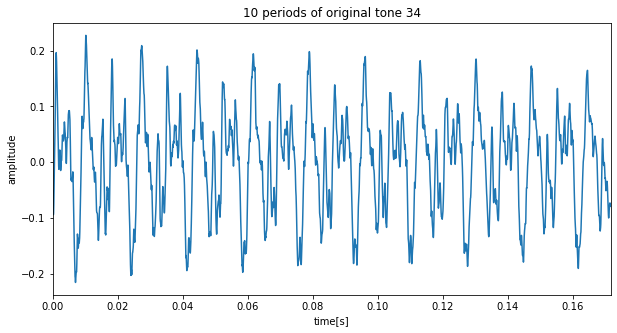

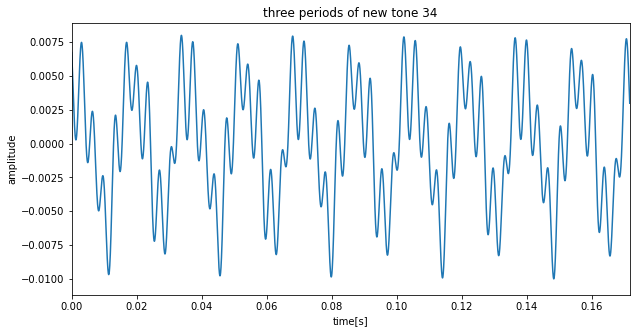

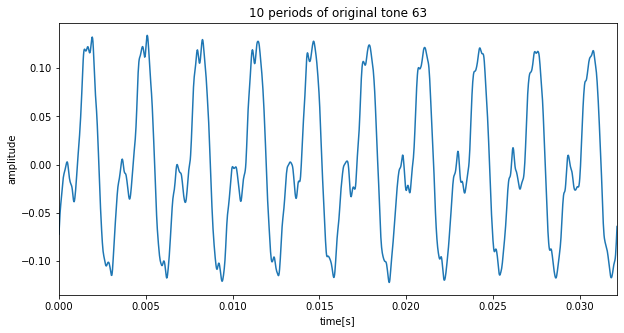

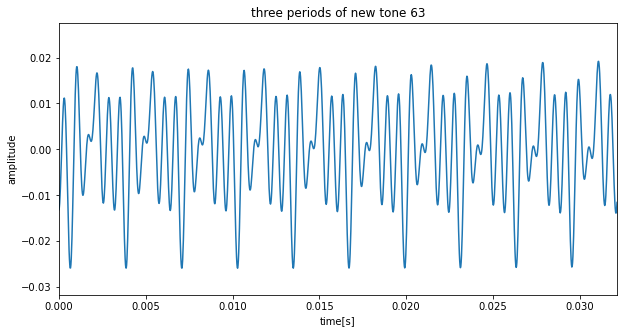

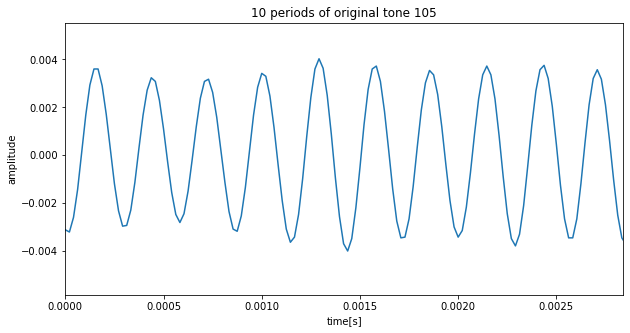

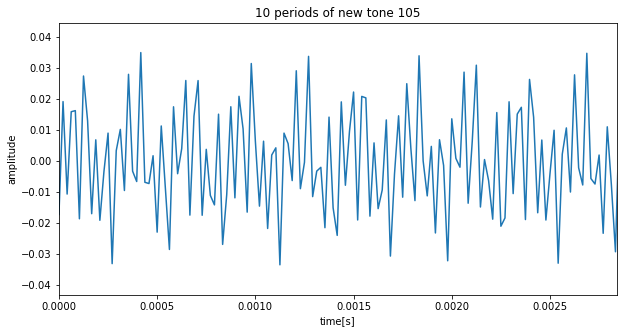

In [17]:
# 4.4 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>  SIGNAL SYNTHESIS  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


#signal = modul*cos(2*pi*frequency*time + faze)


#-----------------------signal synthesis for 34 -------------------------

time = np.linspace(0, 1, Fs)  # array for time 0-1s 48000 point in this interval
a_signal = np.zeros(48000)    # array for signal  
for t in range(0, time.size):
    a_signal[t] = _f0_34_modul[0]*np.cos(2*np.pi*time[t]*_f0_34_co[0] + _f0_34_faze[0])+_f0_34_modul[2]*np.cos(2*np.pi*time[t]*_f0_34_co[2] + _f0_34_faze[1])+_f0_34_modul[3]*np.cos(2*np.pi*time[t]*_f0_34_co[3] + _f0_34_faze[3])+_f0_34_modul[4]*np.cos(2*np.pi*time[t]*_f0_34_co[4] + _f0_34_faze[4])

#-----------------------signal synthesis for 63 -------------------------
b_signal = np.zeros(48000)
for t in range(0, time.size):
    b_signal[t] = _f0_63_modul[0]*np.cos(2*np.pi*time[t]*_f0_63_co[0] + _f0_63_faze[0])+_f0_63_modul[2]*np.cos(2*np.pi*time[t]*_f0_63_co[2] + _f0_63_faze[1])+_f0_63_modul[3]*np.cos(2*np.pi*time[t]*_f0_63_co[3] + _f0_63_faze[3])+_f0_63_modul[4]*np.cos(2*np.pi*time[t]*_f0_63_co[4] + _f0_63_faze[4])

#-----------------------signal synthesis for 105 -------------------------
c_signal = np.zeros(48000)
for t in range(0, time.size):
    c_signal[t] = _f0_105_modul[0]*np.cos(2*np.pi*time[t]*_f0_105_co[0] + _f0_105_faze[0])+_f0_105_modul[2]*np.cos(2*np.pi*time[t]*_f0_105_co[2] + _f0_105_faze[1])+_f0_105_modul[3]*np.cos(2*np.pi*time[t]*_f0_105_co[3] + _f0_105_faze[3])+_f0_105_modul[4]*np.cos(2*np.pi*time[t]*_f0_105_co[4] + _f0_105_faze[4])

    
#----------------------- write new signal -------------------------    
a_signal = a_signal/a_signal.size  # let's get rid of the large amplitude
b_signal = b_signal/b_signal.size
c_signal = c_signal/c_signal.size

sf.write(f'{road}/a.wav', a_signal, Fs)               # write new audio file with my new tone 34
sf.write(f'{road}/b.wav', b_signal, Fs)               # write new audio file with my new tone 63
sf.write(f'{road}/c.wav', c_signal, Fs)              # write new audio file with my new tone 105


plt.figure(figsize=(10, 5))                                                       
plt.plot(np.arange(xall[34].size)/Fs, xall[34])                        #original tone 34                         
plt.xlim(0, period34*10)                                               # on OX 10 periods                                             
plt.title("10 periods of original tone 34")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()

plt.figure(figsize=(10, 5))                                                       
plt.plot(np.arange(a_signal.size)/Fs, a_signal)                          # new tone 34                        
plt.xlim(0, period34*10)                                                 # on OX 10 periods                                                
plt.title("three periods of new tone 34")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()

plt.figure(figsize=(10, 5))                                                       
plt.plot(np.arange(xall[63].size)/Fs, xall[63])                          # original tone 63                         
plt.xlim(0, period63*10)                                                 # on OX 3 periods                                                
plt.title("10 periods of original tone 63")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()
plt.figure(figsize=(10, 5))                                                       
plt.plot(np.arange(b_signal.size)/Fs, b_signal)                          # new tone 63                        
plt.xlim(0, period63*10)                                                 # on OX 10 periods                                                
plt.title("three periods of new tone 63")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()


plt.figure(figsize=(10, 5))                                                       
plt.plot(np.arange(xall[105].size)/Fs, xall[105])                        # original tone 105                        
plt.xlim(0, period105*10)                                                # on OX 10 periods                                      
plt.title("10 periods of original tone 105")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()
plt.figure(figsize=(10, 5))                                                       
plt.plot(np.arange(c_signal.size)/Fs, c_signal)                          # new tone 105                         
plt.xlim(0, period105*10)                                                # on OX 10 periods                              
plt.title("10 periods of new tone 105")
plt.xlabel("time[s]")
plt.ylabel("amplitude")
plt.show()
